In [ ]:
from google.colab import files
uploaded = files.upload()

Saving download.jfif to download.jfif


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
model = ResNet50(weights='imagenet')
img_path = 'download.jfif'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
x = preprocess_input(x)
preds = model.predict(x)
print(preds.shape)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=10)[0])

102967424/102967424 [==============================] - 1s 0us/step
(224, 224, 3)
(1, 224, 224, 3)
1/1 [==============================] - 2s 2s/step
(1, 1000)
35363/35363 [==============================] - 0s 0us/step
Predicted: [('n02106030', 'collie', 0.9169789), ('n02106166', 'Border_collie', 0.025157552), ('n02099601', 'golden_retriever', 0.015742714), ('n02113186', 'Cardigan', 0.0146821095), ('n02105855', 'Shetland_sheepdog', 0.011119936), ('n02113023', 'Pembroke', 0.0104501), ('n02105412', 'kelpie', 0.0013569754), ('n04409515', 'tennis_ball', 0.00046646164), ('n02107908', 'Appenzeller', 0.00045615478), ('n02096294', 'Australian_terrier', 0.00042735544)]


1/1 [==============================] - 2s 2s/step
(1, 7, 7, 512)


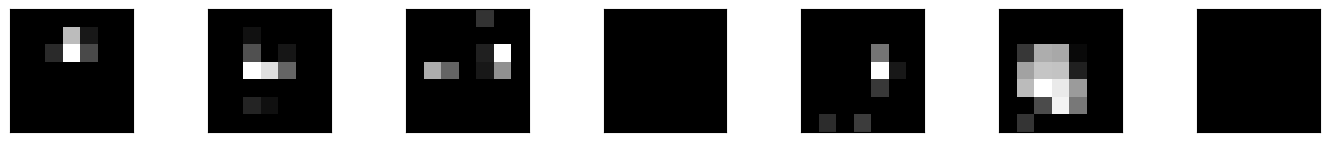

In [ ]:

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
model = VGG16(weights='imagenet', include_top=False)
img_path = 'download.jfif'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
print(features.shape)

# visualize featrure maps
fig = plt.figure(figsize=(20,15))
for i in range(1,features.shape[2]+1):
    plt.subplot(8,8,i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(features[0,:,:,i-1] , cmap='gray')
plt.show()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 73ms/step


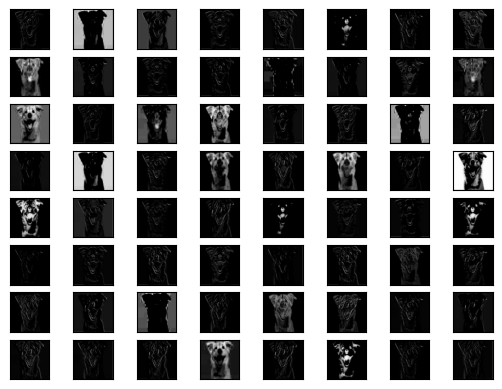

In [ ]:
# plot feature map of first conv layer for given image
# visualize feature maps output from each block in the vgg model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()
# load the image with the required shape
img = load_img('download.jfif', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
 for _ in range(square):
   # specify subplot and turn of axis
   ax = pyplot.subplot(square, square, ix)
   ax.set_xticks([])
   ax.set_yticks([])
   # plot filter channel in grayscale
   pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
   ix += 1
# show the figure
pyplot.show()